# Mnist Dataset - Digit Recognition
This will be done with the help of a Neural Network
with custom architecture.
The number of neurons and hidden layers can be changed within the code.
> - First step: Importing the Dataset
> - Second step: The fundamental functions (Sigmoid) are implemented
> - Third step: The neural network is implemented and initialised
> - Fourth step: The Network is getting trained
> - Fifth step: The Classification is tested and validated

### Import and Preprocess Data
Images reshaped into column vectors (no convolutional NN).
All values into range $ (0,1] $. Zero values hinder weight updates during backpropagation.

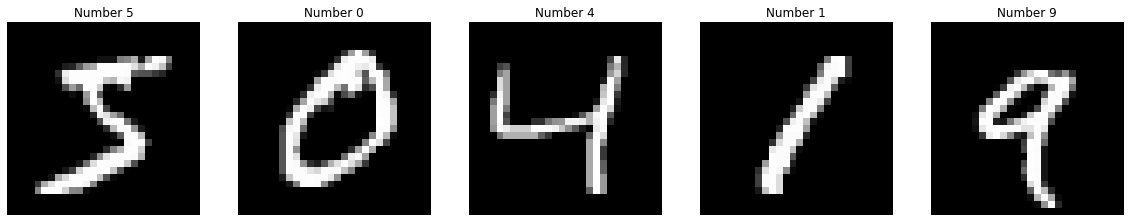

Example target for first digit: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [110]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

train_imagesimp = idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labelsimp = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

imagesize = 28
imagenumb = 60000
train_images = np.zeros((imagesize ** 2, imagenumb))

for i in range(0, imagenumb):
    train_images[:, i] = train_imagesimp[i].reshape(imagesize ** 2)

train_images = 0.99*train_images/255 + 0.01

train_labels = np.zeros((10, imagenumb))

for i in range(0, imagenumb):
    train_labels[train_labelsimp[i], i] = 1

plt.figure(figsize=(20,5))
plt.title('NMIST Dataset')
for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(train_images[:,i-1].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title('Number '+str(train_labelsimp[i-1]))
plt.show()
print('Example target for first digit: '+str(train_labels[:,0]))

### Basic Functions
Activation functions:
>Sigmoid function: $$ y = \frac{1}{1+e^{-x}} $$

>Derivative Sigmoid function: $$ y = x * (1-x) $$

In [111]:
def sigmoid(x):
    return 1/(1+np.e ** -x)
def d_sigmoid(x):
    return x * (1-x)

activation_func = sigmoid
d_activation_func_activation_func = d_sigmoid

### Neural Network Implementation
In order to have a flexible architecture, there will be given a list,
in which the desired arguments can be filled in.

In [112]:
NN_architecture = [
    {"inputs":imagesize **2, "neurons":128},
    {"inputs":128,            "neurons":64},
    {"inputs":64,            "neurons":32},
    {"inputs":32,            "neurons":32},
    {"inputs":32,            "neurons":10}
]

def forward_single_layer(out_prev, w_curr, b_curr):
        return activation_func(np.dot(w_curr, out_prev)+b_curr)

class NeuralNetwork:
    def __init__(self, architecture):
        self.architecture = architecture
        self.parameters = {}
        for idx, layer in enumerate(architecture):
            layer_idx = idx+1
            layer_input = layer["inputs"]
            layer_output = layer["neurons"]
            self.parameters['W'+str(layer_idx)] = np.random.randn(layer_output,layer_input)
            self.parameters['B'+str(layer_idx)] = np.random.randn(layer_output,1)

    def forward_propagation(self, inputs):
        inputs = np.array(inputs, ndmin=2).T
        out_curr = inputs
        memory = {}
        for idx, layer in enumerate(self.architecture):
            layer_idx = idx+1
            w_curr = self.parameters["W"+str(layer_idx)]
            b_curr = self.parameters["B"+str(layer_idx)]
            out_curr = forward_single_layer(out_prev=out_curr,w_curr=w_curr,b_curr=b_curr)
            memory[idx] = out_curr
        return out_curr, memory


    def train_iteration(self, inputs, target, learn_rate):
        target = np.array(target, ndmin=2).T
        output, memory = self.forward_propagation(inputs)
        inputs = np.array(inputs, ndmin=2).T
        loss = 0
        for idx, layer in reversed(list(enumerate(self.architecture))):
            layer_idx = idx+1
            if layer_idx == len(self.architecture):
                loss += target - output
                adjust_w = 1/layer["neurons"]*learn_rate*(loss*d_activation_func_activation_func(memory[idx])).dot(memory[idx-1].T)
                adjust_b = 1/layer["neurons"]*learn_rate*loss*d_activation_func_activation_func(memory[idx])
                self.parameters["W"+str(layer_idx)] += (adjust_w/learn_rate - adjust_b.dot(np.ones((1,adjust_w.shape[1]))))*learn_rate
                self.parameters["B"+str(layer_idx)] += adjust_b
            elif layer_idx == 1:
                loss = self.parameters["W"+str(layer_idx+1)].T.dot(loss)
                adjust_w = 1/layer["neurons"]*learn_rate*(loss*d_activation_func_activation_func(memory[idx])).dot(inputs.T)
                adjust_b = 1/layer["neurons"]*learn_rate*loss*d_activation_func_activation_func(memory[idx])
                self.parameters["W"+str(layer_idx)] += (adjust_w/learn_rate - adjust_b.dot(np.ones((1,adjust_w.shape[1]))))*learn_rate
                self.parameters["B"+str(layer_idx)] += adjust_b
            else:
                loss = self.parameters["W"+str(layer_idx+1)].T.dot(loss)
                adjust_w = 1/layer["neurons"]*learn_rate*(loss*d_activation_func_activation_func(memory[idx])).dot(memory[idx-1].T)
                adjust_b = 1/layer["neurons"]*learn_rate*loss*d_activation_func_activation_func(memory[idx])
                self.parameters["W"+str(layer_idx)] += (adjust_w/learn_rate - adjust_b.dot(np.ones((1,adjust_w.shape[1]))))*learn_rate
                self.parameters["B"+str(layer_idx)] += adjust_b

    def train(self, inputs, targets):
        for i in range(0,imagenumb):
            inputdata = inputs[:,i]
            target = targets[:,i]
            self.train_iteration(inputdata, target, 0.1)
            if i/imagenumb*100 % 10 == 0:
                print('Training state: ', i/imagenumb*100, ' %')

NN = NeuralNetwork(NN_architecture)

### Train Neural Network with Training Data

In [113]:
NN.train(train_images, train_labels)

Training state:  0.0  %
Training state:  10.0  %
Training state:  20.0  %
Training state:  30.0  %
Training state:  40.0  %
Training state:  50.0  %
Training state:  60.0  %
Training state:  70.0  %
Training state:  80.0  %
Training state:  90.0  %


In [114]:
out, mem = NN.forward_propagation(train_images[:,0])
print(out)
print(train_labels[:,0])

[[0.02918073]
 [0.00135623]
 [0.02924572]
 [0.18372696]
 [0.01484789]
 [0.79306578]
 [0.00582816]
 [0.00865178]
 [0.01523865]
 [0.09410014]]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Test classification and validation
Therefore, the test dataset of the MNIST Dataset is chosen.
These are totally new images, which were not contained in the trainings dataset


True Digit: 7	 Classified Digit: 7
True Digit: 2	 Classified Digit: 2
True Digit: 1	 Classified Digit: 1
True Digit: 0	 Classified Digit: 0
True Digit: 4	 Classified Digit: 4
True Digit: 1	 Classified Digit: 1
True Digit: 4	 Classified Digit: 4
True Digit: 9	 Classified Digit: 9
True Digit: 5	 Classified Digit: 6	 Failed !
True Digit: 9	 Classified Digit: 9
True Digit: 0	 Classified Digit: 0
True Digit: 6	 Classified Digit: 6
True Digit: 9	 Classified Digit: 9
True Digit: 0	 Classified Digit: 0
True Digit: 1	 Classified Digit: 1
True Digit: 5	 Classified Digit: 5
True Digit: 9	 Classified Digit: 9
True Digit: 7	 Classified Digit: 7
True Digit: 3	 Classified Digit: 3
True Digit: 4	 Classified Digit: 4
True Digit: 9	 Classified Digit: 9
True Digit: 6	 Classified Digit: 6
True Digit: 6	 Classified Digit: 6
True Digit: 5	 Classified Digit: 5
True Digit: 4	 Classified Digit: 4
True Digit: 0	 Classified Digit: 0
True Digit: 7	 Classified Digit: 7
True Digit: 4	 Classified Digit: 4
True Digit

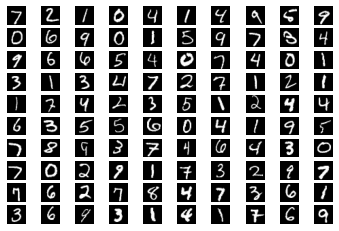

In [115]:
test_imagesimp = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

imagenumb = len(test_labels)

test_images = np.zeros((imagesize ** 2, imagenumb))

for i in range(0, imagenumb):
    test_images[:, i] = test_imagesimp[i].reshape(imagesize ** 2)

test_images = 0.99*test_images/255 + 0.01

for i in range(0,100):
    result, mem = NN.forward_propagation(test_images[:,i])
    text = "True Digit: "+str(test_labels[i])+"\t Classified Digit: "+str(np.argmax(result))
    if test_labels[i] != np.argmax(result):
        print(text + '\t Failed !')
    else:
        print(text)
    plt.subplot(10,10,i+1)
    plt.imshow(test_images[:,i].reshape(imagesize,imagesize), cmap='gray')
    plt.axis('off')

### Validation

Number of classifications:  10000
Performance of the NN:  0.9225
[ 91.  33.  67. 131.  39.  60.  80.  25.  73. 180.]


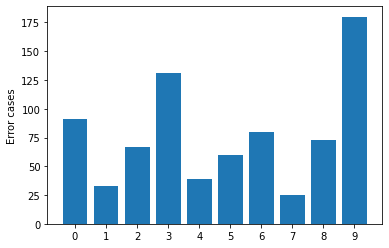

In [116]:
count = 0
number = np.empty(10)
for i in range(len(test_labels)):
    result, mem = NN.forward_propagation(test_images[:,i])
    result = np.argmax(result)
    if result != test_labels[i]:
        count += 1
        number[result] += 1

print('Number of classifications: ', str(len(test_labels)))
print('Performance of the NN: ', str(1-count/len(test_labels)))
print(number)
digits = ['0','1','2','3','4','5','6','7','8','9']
plt.figure()
plt.bar(digits,number)
plt.ylabel('Error cases')
plt.show()